In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')

In [20]:
data_raw = pd.read_csv("../data/drug_consumption.data",header=None)

In [21]:
data = data_raw.copy()
print(data.shape)
data.head()

(1885, 32)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1,0.498,0.482,-0.059,0.961,0.126,0.313,-0.575,-0.583,-0.917,-0.007,-0.217,-1.181,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.079,-0.482,1.984,0.961,-0.317,-0.678,1.939,1.435,0.761,-0.143,-0.711,-0.216,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.498,-0.482,-0.059,0.961,-0.317,-0.467,0.805,-0.847,-1.621,-1.014,-1.380,0.401,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.952,0.482,1.164,0.961,-0.317,-0.149,-0.806,-0.019,0.590,0.585,-1.380,-1.181,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.498,0.482,1.984,0.961,-0.317,0.735,-1.633,-0.452,-0.302,1.306,-0.217,-0.216,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Fixing the column names

In [22]:
col_names = pd.read_excel(open('../data/drug_consumption_column_mappings.xlsx', 'rb'), sheet_name='col_names')

In [23]:
data = data.rename(columns=dict(zip(col_names.col_number, col_names.col_name)))
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.498,0.482,-0.059,0.961,0.126,0.313,-0.575,-0.583,-0.917,-0.007,-0.217,-1.181,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.079,-0.482,1.984,0.961,-0.317,-0.678,1.939,1.435,0.761,-0.143,-0.711,-0.216,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.498,-0.482,-0.059,0.961,-0.317,-0.467,0.805,-0.847,-1.621,-1.014,-1.380,0.401,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.952,0.482,1.164,0.961,-0.317,-0.149,-0.806,-0.019,0.590,0.585,-1.380,-1.181,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.498,0.482,1.984,0.961,-0.317,0.735,-1.633,-0.452,-0.302,1.306,-0.217,-0.216,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [24]:
recode_vars = ['Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore']
for r in recode_vars:
    temp_df = pd.read_excel(open('../data/drug_consumption_column_mappings.xlsx', 'rb'), sheet_name=f'{r}')
    temp_dict = dict(zip(temp_df.old_value, temp_df.new_value))
    data = data.replace({f'{r}': temp_dict})
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,39.000,36.000,42.000,37.000,42.000,-0.217,-1.181,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25 - 34,Male,Doctorate Degree,UK,White,29.000,52.000,55.000,48.000,41.000,-0.711,-0.216,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,31.000,45.000,40.000,32.000,34.000,-1.380,0.401,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18 - 24,Female,Masters Degree,UK,White,34.000,34.000,46.000,47.000,46.000,-1.380,-1.181,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35 - 44,Female,Doctorate Degree,UK,White,43.000,28.000,43.000,41.000,50.000,-0.217,-0.216,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [25]:
drug_vars = ['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer']
temp_df = pd.read_excel(open('../data/drug_consumption_column_mappings.xlsx', 'rb'), sheet_name='CLcodes')
CLcodes = dict(zip(temp_df.old_value, temp_df.new_value))
data = data.replace(CLcodes)
data.head()


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,39.000,36.000,42.000,37.000,42.000,-0.217,-1.181,Used in Last Week,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Used in Last Week,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25 - 34,Male,Doctorate Degree,UK,White,29.000,52.000,55.000,48.000,41.000,-0.711,-0.216,Used in Last Week,Used in Last Decade,Used in Last Decade,Never Used,Used in Last Day,Used in Last Month,Used in Last Day,Used in Last Year,Never Used,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,31.000,45.000,40.000,32.000,34.000,-1.380,0.401,Used in Last Day,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Year,Used in Last Month,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18 - 24,Female,Masters Degree,UK,White,34.000,34.000,46.000,47.000,46.000,-1.380,-1.181,Used in Last Month,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Decade,Used in Last Month,Used in Last Decade,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35 - 44,Female,Doctorate Degree,UK,White,43.000,28.000,43.000,41.000,50.000,-0.217,-0.216,Used in Last Month,Used over a Decade Ago,Used over a Decade Ago,Never Used,Used in Last Day,Used in Last Year,Used in Last Day,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


## Data dictionary

In [15]:
#https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

## Missing values

In [17]:
data.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

### Features

### Categorical

<AxesSubplot:xlabel='Age', ylabel='count'>

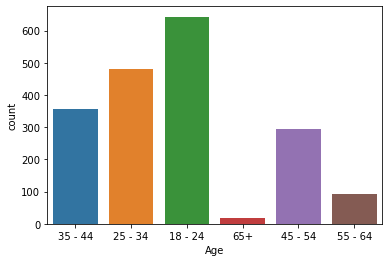

In [18]:
sns.countplot(x="Age", data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

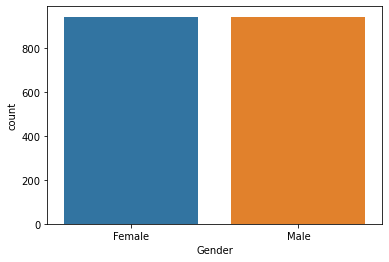

In [26]:
sns.countplot(x="Gender", data=data)

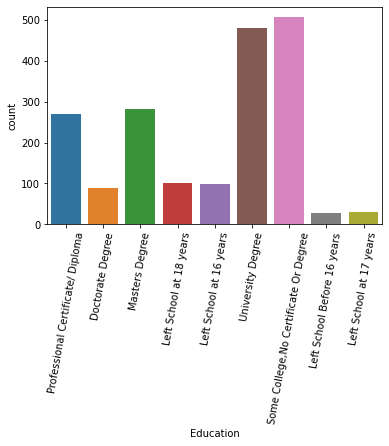

In [30]:
ax = sns.countplot(x="Education", data=data)
ax.tick_params(axis='x', rotation=80)

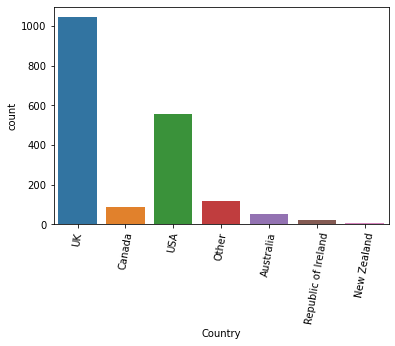

In [33]:
ax = sns.countplot(x="Country", data=data)
ax.tick_params(axis='x', rotation=80)

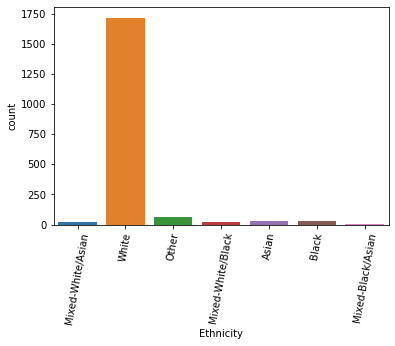

In [35]:
ax =sns.countplot(x="Ethnicity", data=data)
ax.tick_params(axis='x', rotation=80)

### Continuous

In [57]:
data.describe()

,ID,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000
mean,945.295,35.921,39.577,45.199,42.866,41.437,0.007,-0.003
std,545.168,9.136,6.774,7.787,6.438,6.967,0.954,0.964
min,1.000,12.000,16.000,2.153,12.000,17.000,-2.555,-2.078
25%,474.000,29.000,35.000,41.000,39.000,37.000,-0.711,-0.526
50%,946.000,36.000,40.000,46.000,43.000,42.000,-0.217,0.080
75%,1417.000,42.000,44.000,50.000,48.000,46.000,0.530,0.765
max,1888.000,60.000,59.000,60.000,60.000,59.000,2.902,1.922


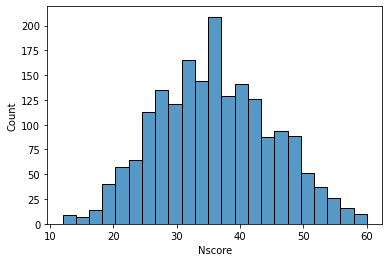

In [46]:
ax = sns.histplot(data.Nscore)#,bins=np.arange(12,24))
#d.ticklabel_format(useOffset=False,style='plain')
#d.tick_params(labelrotation=45)

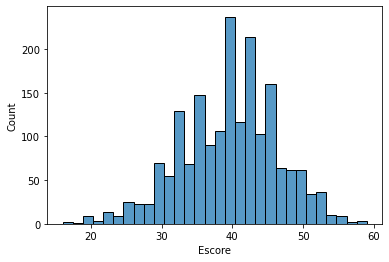

In [47]:
ax = sns.histplot(data.Escore)#,bins=np.arange(12,24))

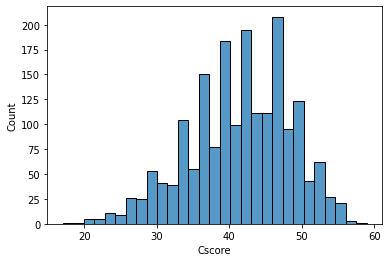

In [48]:
ax = sns.histplot(data.Cscore)#,bins=np.arange(12,24))

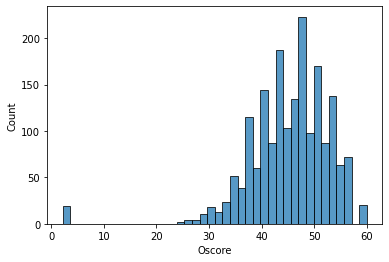

In [49]:
ax = sns.histplot(data.Oscore)#,bins=np.arange(12,24))

In [45]:
data.Oscore.value_counts()

46.000    134
48.000    116
47.000    107
45.000    103
44.000    101
49.000     98
42.000     87
51.000     87
52.000     87
43.000     86
50.000     83
53.000     81
41.000     76
40.000     68
38.000     64
55.000     63
39.000     60
54.000     57
37.000     51
36.000     39
56.000     38
57.000     34
35.000     26
34.000     25
33.000     23
2.153      19
59.000     13
32.000     13
29.000     11
31.000      9
30.000      9
60.000      7
26.000      4
28.000      4
24.000      2
Name: Oscore, dtype: int64

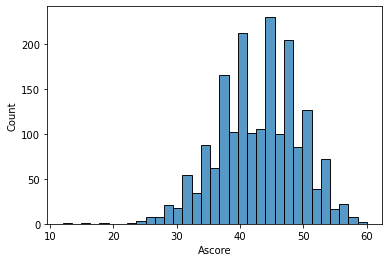

In [50]:
ax = sns.histplot(data.Ascore)#,bins=np.arange(12,24))

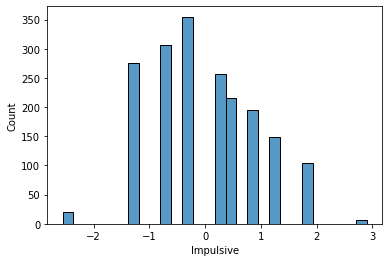

In [51]:
# This varaible is normalized
ax = sns.histplot(data.Impulsive)#,bins=np.arange(12,24))

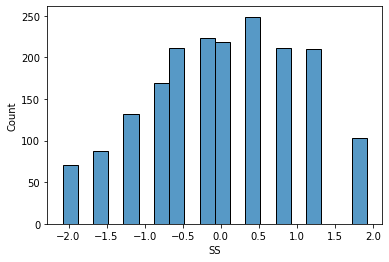

In [53]:
# This variable is normalized
ax = sns.histplot(data.SS)#,bins=np.arange(12,24))

## Target variables

In [86]:
# drug_vars
freq_table = data[drug_vars[0]].value_counts().to_frame()
print(freq_table.index)
for d in drug_vars[1:]:
    temp = data[d].value_counts().to_frame()
    freq_table = freq_table.merge(temp,left_index=True,right_index=True,how='left')
freq_table.head(10)

Index(['Used in Last Week', 'Used in Last Day', 'Used in Last Month',
       'Used in Last Year', 'Used in Last Decade', 'Used over a Decade Ago',
       'Never Used'],
      dtype='object')


,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer
Used in Last Week,759,61,14,84,273,185,683,41,9,63,16,33,64,56,48,40,157,NaN
Used in Last Day,505,102,3,95,1385,463,807,19,2,21,13,4,67,13,73,4,610,NaN
Used in Last Month,287,75,24,120,106,140,296,99,9,156,24,42,110,97,50,115,108,1.000
Used in Last Year,198,198,92,236,60,211,54,258,59,277,65,129,323,214,149,275,185,2.000
Used in Last Decade,68,243,237,234,24,266,10,270,112,234,94,142,198,177,97,260,204,3.000
Used over a Decade Ago,34,230,210,116,10,207,3,160,67,113,68,45,29,259,39,209,193,2.000
Never Used,34,976,1305,1000,27,413,32,1038,1627,1021,1605,1490,1094,1069,1429,982,428,1877.000


In [ ]:
def calc_target(row, target, drug_vars):
    for d in drug_vars:
        if d not in ('Alcohol','Caff','Chocolate'):
            if row[d] == target:
                return True
    return False

data['used_ilicit_drug_in_last_week'] = data.apply(calc_target,target='Used in Last Week',drug_vars=drug_vars,axis=1)

In [91]:
data.used_ilicit_drug_in_last_week.value_counts()

True     1014
False     871
Name: used_ilicit_drug_in_last_week, dtype: int64

In [92]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,used_ilicit_drug_in_last_week
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,39.000,36.000,42.000,37.000,42.000,-0.217,-1.181,Used in Last Week,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Used in Last Week,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,True
1,2,25 - 34,Male,Doctorate Degree,UK,White,29.000,52.000,55.000,48.000,41.000,-0.711,-0.216,Used in Last Week,Used in Last Decade,Used in Last Decade,Never Used,Used in Last Day,Used in Last Month,Used in Last Day,Used in Last Year,Never Used,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used,False
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,31.000,45.000,40.000,32.000,34.000,-1.380,0.401,Used in Last Day,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Year,Used in Last Month,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used,False
3,4,18 - 24,Female,Masters Degree,UK,White,34.000,34.000,46.000,47.000,46.000,-1.380,-1.181,Used in Last Month,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Decade,Used in Last Month,Used in Last Decade,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,False
4,5,35 - 44,Female,Doctorate Degree,UK,White,43.000,28.000,43.000,41.000,50.000,-0.217,-0.216,Used in Last Month,Used over a Decade Ago,Used over a Decade Ago,Never Used,Used in Last Day,Used in Last Year,Used in Last Day,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used,False


# Transformation

In [ ]:
# Recode age
# Recode Education
# Recode Ethnicity

In [103]:
data.Ethnicity.value_counts()

White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Asian      20
Mixed-White/Black      20
Mixed-Black/Asian       3
Name: Ethnicity, dtype: int64

In [121]:
def recode_Age(val):
    out = val.replace(' ','')
    out = out.replace('-','_')
    out = out.replace('+','plus')
    return out

def recode_Education(val):
    if val == 'Some College,No Certificate Or Degree':
        return 'Some_College'
    elif val == 'University Degree':
        return 'College'
    elif val == 'Masters Degree':
        return 'Masters'
    elif val == 'Doctorate Degree':
        return 'Doctorate'
    elif val == 'Professional Certificate/ Diploma':
        return 'Profess_Diploma'
    elif val == 'Left School at 18 years':
        return 'Left_18'
    elif val == 'Left School at 17 years':
        return 'Left_17'
    elif val == 'Left School at 16 years':
        return 'Left_16'
    elif val == 'Left School Before 16 years':
        return 'Left_Before_16'
    
def recode_Country(val):
    out = val
    if val == 'Republic of Ireland':
        out = 'Ireland'
    elif val == 'New Zealand':
        out = val.replace(' ','_')
    return out

def recode_Ethnicity(val):
    out = val.replace('-','_')
    out = out.replace('/','_')
    return out

In [122]:
data.Age = data.Age.apply(recode_Age)
data.Education = data.Education.apply(recode_Education)
data.Country = data.Country.apply(recode_Country)
data.Ethnicity = data.Ethnicity.apply(recode_Ethnicity)

### Constructing the X matrix

In [123]:
X = pd.DataFrame()

# Continous and ordinal variables
#Nscore	Escore	Oscore	Ascore	Cscore	Impulsive	SS	
X['Nscore'] = data['Nscore']
X['Escore'] = data['Escore']
X['Oscore'] = data['Oscore']
X['Ascore'] = data['Ascore']
X['Cscore'] = data['Cscore']
X['Impulsive'] = data['Impulsive']
X['SS'] = data['SS']

#Binary variables
X['Male'] = data['Gender'].apply(lambda x: 0 if x=='Female' else 1)

# One-hot encoded variables
# Age
age_one_hot = pd.get_dummies(data['Age'],drop_first=True)
X = pd.merge(X,age_one_hot.add_prefix('Age_'), how='left',left_index=True, right_index=True)
#Education
edu_one_hot = pd.get_dummies(data['Education'],drop_first=True)
X = pd.merge(X,edu_one_hot.add_prefix('Edu_'), how='left',left_index=True, right_index=True)
#Country
country_one_hot = pd.get_dummies(data['Country'],drop_first=True)
X = pd.merge(X,country_one_hot.add_prefix('Country_'), how='left',left_index=True, right_index=True)
#Ethnicity
race_one_hot = pd.get_dummies(data['Ethnicity'],drop_first=True)
X = pd.merge(X,race_one_hot.add_prefix('Race_'), how='left',left_index=True, right_index=True)

In [128]:
print(X.shape)
X.head()

(1885, 33)


,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Male,Age_25_34,Age_35_44,Age_45_54,Age_55_64,Age_65plus,Edu_Doctorate,Edu_Left_16,Edu_Left_17,Edu_Left_18,Edu_Left_Before_16,Edu_Masters,Edu_Profess_Diploma,Edu_Some_College,Country_Canada,Country_Ireland,Country_New_Zealand,Country_Other,Country_UK,Country_USA,Race_Black,Race_Mixed_Black_Asian,Race_Mixed_White_Asian,Race_Mixed_White_Black,Race_Other,Race_White
0,39.000,36.000,42.000,37.000,42.000,-0.217,-1.181,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,29.000,52.000,55.000,48.000,41.000,-0.711,-0.216,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,31.000,45.000,40.000,32.000,34.000,-1.380,0.401,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,34.000,34.000,46.000,47.000,46.000,-1.380,-1.181,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,43.000,28.000,43.000,41.000,50.000,-0.217,-0.216,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [124]:
X.describe()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Male,Age_25_34,Age_35_44,Age_45_54,Age_55_64,Age_65plus,Edu_Doctorate,Edu_Left_16,Edu_Left_17,Edu_Left_18,Edu_Left_Before_16,Edu_Masters,Edu_Profess_Diploma,Edu_Some_College,Country_Canada,Country_Ireland,Country_New_Zealand,Country_Other,Country_UK,Country_USA,Race_Black,Race_Mixed_Black_Asian,Race_Mixed_White_Asian,Race_Mixed_White_Black,Race_Other,Race_White
count,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000
mean,35.921,39.577,45.199,42.866,41.437,0.007,-0.003,0.500,0.255,0.189,0.156,0.049,0.010,0.047,0.053,0.016,0.053,0.015,0.150,0.143,0.268,0.046,0.011,0.003,0.063,0.554,0.295,0.018,0.002,0.011,0.011,0.033,0.912
std,9.136,6.774,7.787,6.438,6.967,0.954,0.964,0.500,0.436,0.392,0.363,0.217,0.097,0.212,0.223,0.125,0.224,0.121,0.357,0.350,0.443,0.210,0.102,0.051,0.242,0.497,0.456,0.131,0.040,0.102,0.102,0.180,0.283
min,12.000,16.000,2.153,12.000,17.000,-2.555,-2.078,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,29.000,35.000,41.000,39.000,37.000,-0.711,-0.526,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,36.000,40.000,46.000,43.000,42.000,-0.217,0.080,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,42.000,44.000,50.000,48.000,46.000,0.530,0.765,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
max,60.000,59.000,60.000,60.000,59.000,2.902,1.922,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [129]:
# Code target as top 25%
y = data["used_ilicit_drug_in_last_week"].apply(lambda x: 1 if x == True  else 0 )
print(y.shape)
print(y.value_counts())

(1885,)
1    1014
0     871
Name: used_ilicit_drug_in_last_week, dtype: int64


## Correlations

<AxesSubplot:>

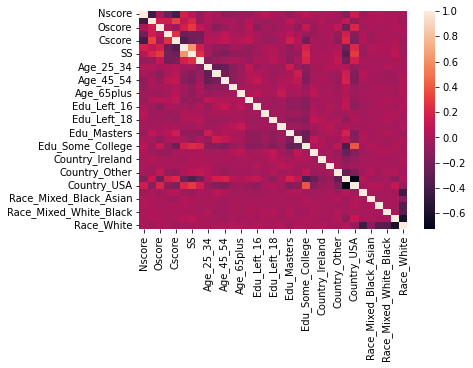

In [130]:
# Feature correlation
corr = X.corr()
# Heatmap
sns.heatmap(corr)

### Reset indices before saving

In [131]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [132]:
X.shape

(1885, 33)

In [133]:
y.shape

(1885,)

In [134]:
# Save the csvs
X.to_csv("../matrices/drug_use/X.csv")
y.to_csv("../matrices/drug_use/y.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../matrices/drug_use/X.csv'